In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass



# Ploting

In [2]:
def enrich_with_elevation(points, dataset="eudem25m"):
    
    points_str = [f"{lat},{lon}" for lat,lon in points]
    locations = "|".join(points_str)
    response = requests.get(f"https://api.opentopodata.org/v1/{dataset}?locations={locations}")
    elevations = [p['elevation'] for p in response.json()['results']]

    lats = [x for (x,_) in points]
    lons = [y for (_,y) in points]

    ret = zip(lats,lons,elevations)
    return list(ret)

In [3]:

def get_street_points(street_name,bbox):
    overpass = Overpass()
    query = overpassQueryBuilder(bbox=bbox,
    elementType='way',selector=f'"name"="{street_name}"')

    road_points = []
    for e in overpass.query(query).elements():
        for node in e.nodes():
            road_points.append((node.lat(),node.lon()))

    points = enrich_with_elevation(road_points)
    return points

            

In [4]:

def plot_street(street_name, bbox, scatter=False):

    points = get_street_points(street_name, bbox)

    lats = [x for (x,_,_) in points]
    lons = [y for (_,y,_) in points]
    els = [z for (_,_,z) in points]
    # plot 2d
    fig = plt.figure()
    ax = fig.add_subplot(1, 2, 1)

    ax.set_aspect('equal', adjustable='box') #equal scale on both axes
    ax.set_title(f"{street_name} 2D")
    if scatter:
        ax.scatter(lons,lats)
    else:
        ax.plot(lons,lats,'--o')

    ax.ticklabel_format(useOffset=False, style='plain') 

    # plot 3d
    ax = fig.add_subplot(1, 2, 2, projection='3d')

    if scatter:
        ax.scatter(lons,lats,els)
    else:
        ax.plot3D(lats, lons, els,'--o') 
        
    ax.set_title(f"{street_name} 3D")
    ax.ticklabel_format(useOffset=False, style='plain') 


  
    

In [ ]:
KETY_BBOX = [49.839258, 19.153293, 49.920978, 19.305325]
plot_street("Czaniecka", KETY_BBOX)

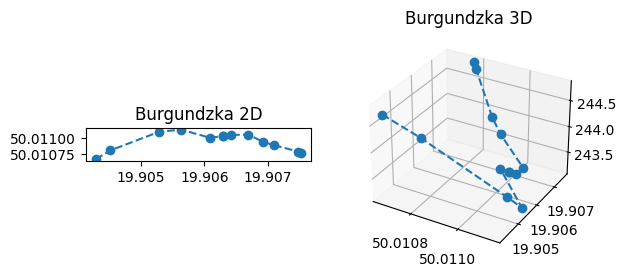

In [5]:
krakow_bbox = [49.973493, 19.807804, 50.123627, 20.097225]
plot_street("Burgundzka", krakow_bbox)

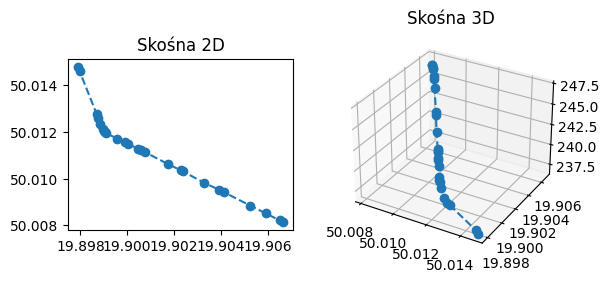

In [6]:
plot_street("Skośna", krakow_bbox)

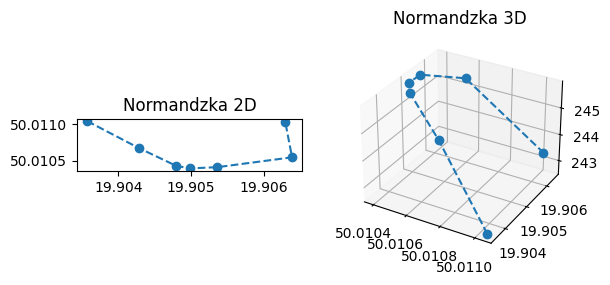

In [7]:
plot_street("Normandzka", krakow_bbox)

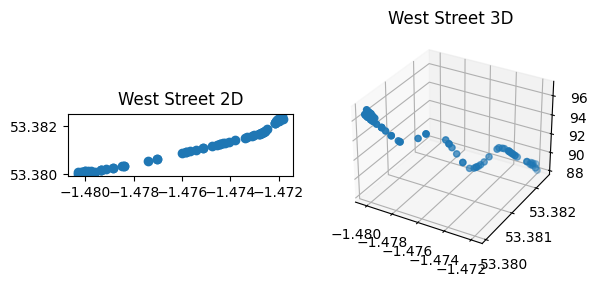

In [9]:
sheffield_bbox = [53.356987, -1.510101, 53.402656, -1.433196]
plot_street("West Street",sheffield_bbox, scatter=True)

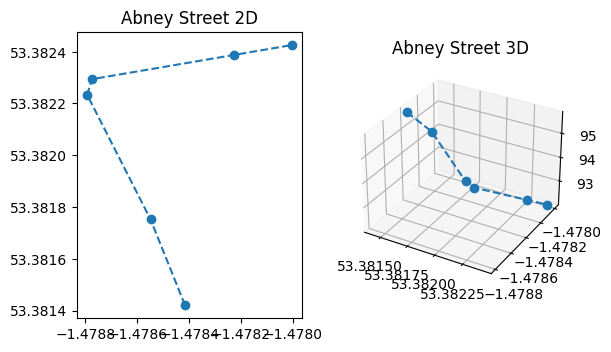

In [10]:
plot_street("Abney Street",sheffield_bbox, scatter=False)

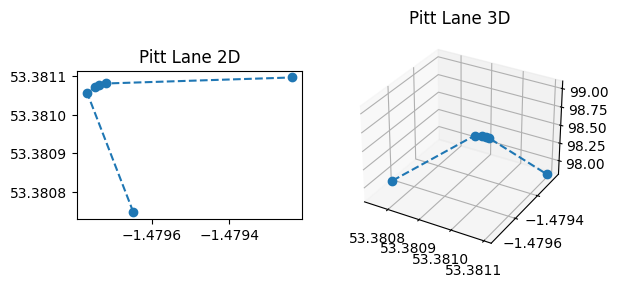

In [11]:
plot_street("Pitt Lane",sheffield_bbox, scatter=False)

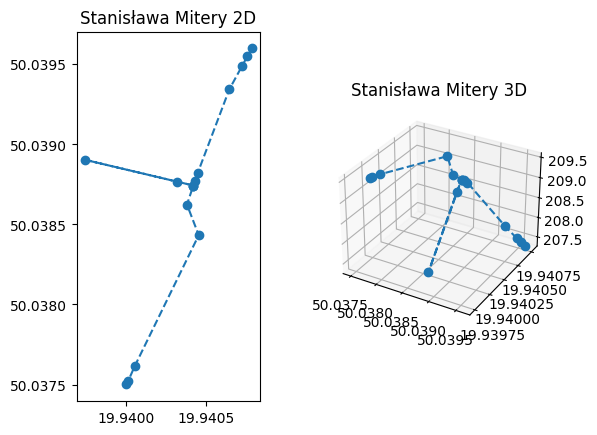

In [12]:
plot_street("Stanisława Mitery", krakow_bbox, scatter=False)

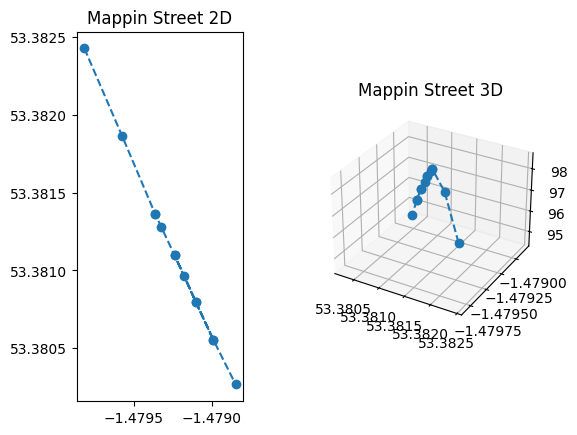

In [13]:
plot_street("Mappin Street", sheffield_bbox)

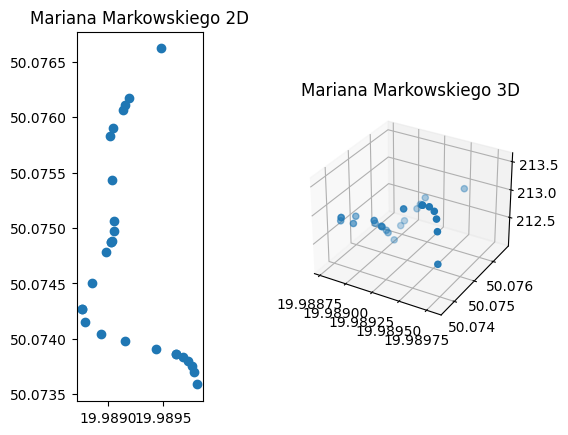

In [14]:
plot_street("Mariana Markowskiego",krakow_bbox, scatter=True)